## IMPORT LIBRARIES 

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [4]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


## VISUALIZE DATA

[1]


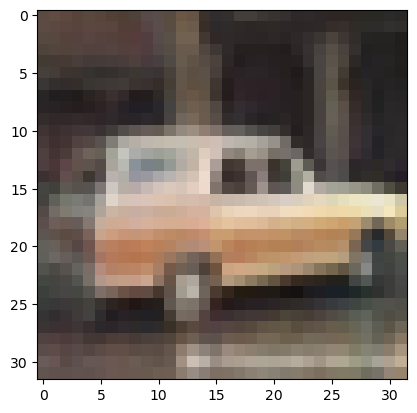

In [7]:
i = 1006
plt.imshow(X_train[i])
print(y_train[i])

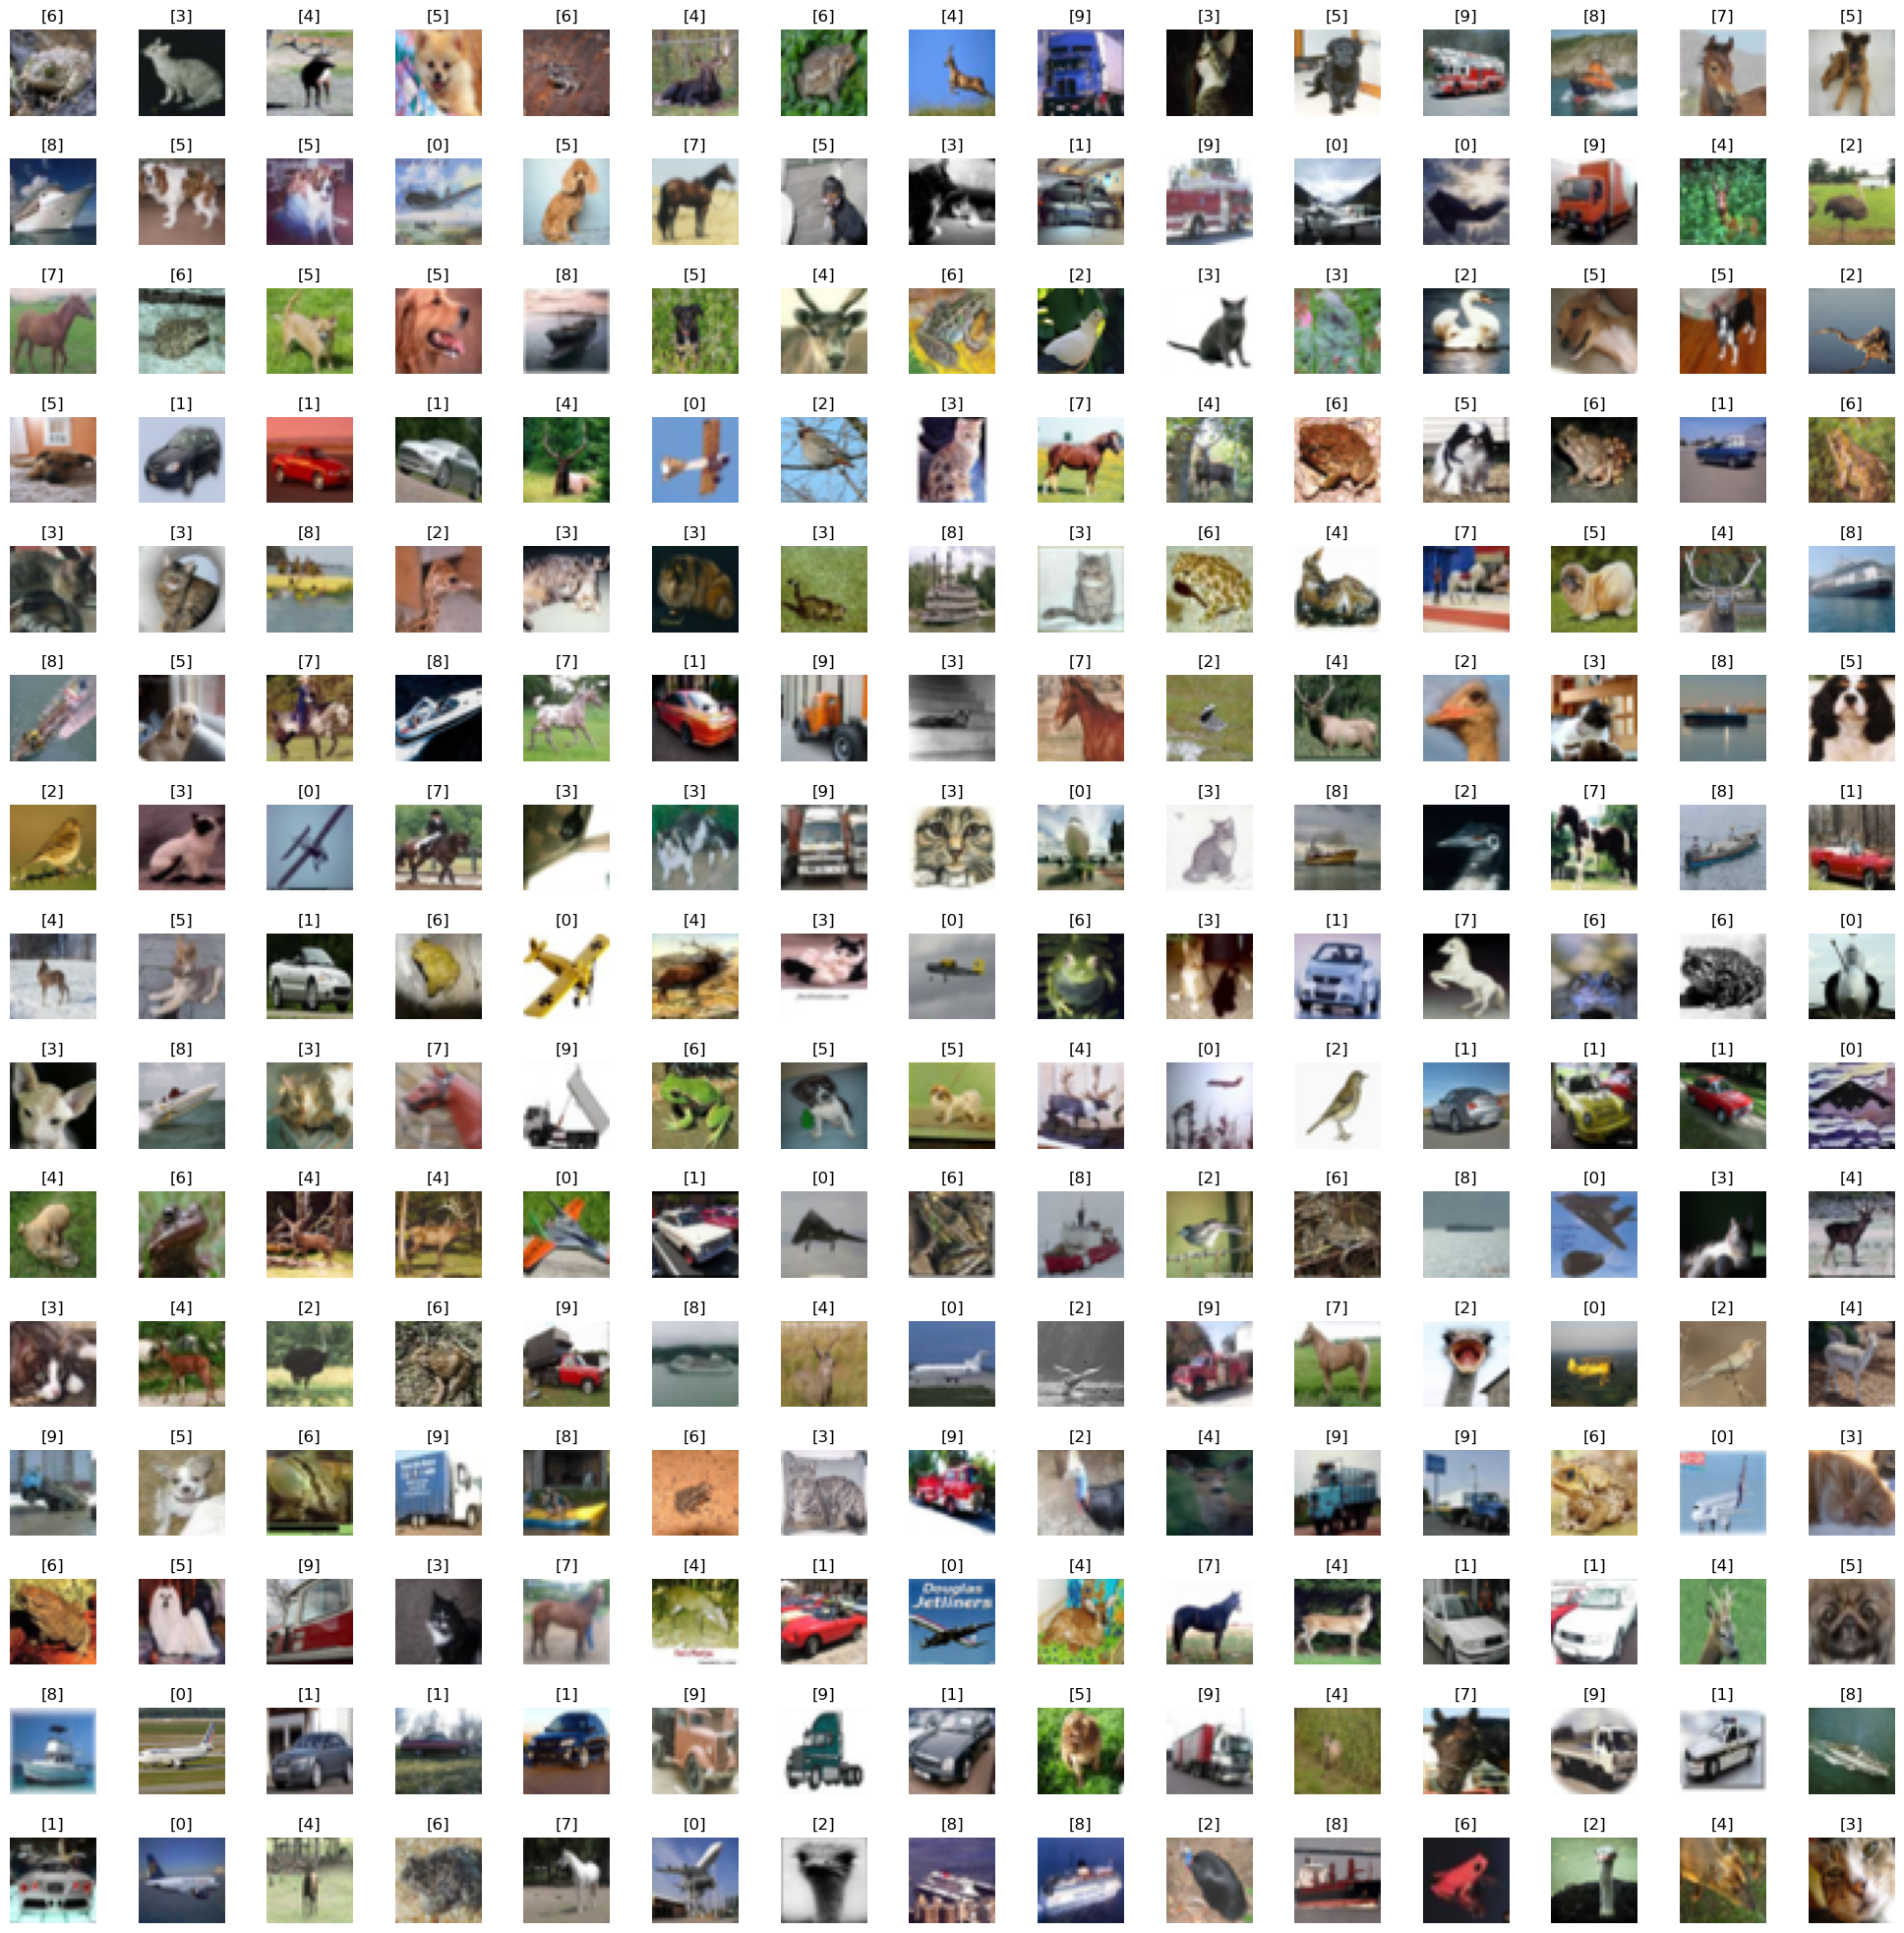

In [8]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # Pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis("off")

plt.subplots_adjust(hspace = 0.5)

In [9]:
n_training

50000

## DATA PREPARATION

In [11]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [12]:
number_cat = 10

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
import keras 
y_train = keras.utils.to_categorical(y_train, 10) # CONVERT NUMBERS TO CATEGORICAL FORMAT

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [16]:
y_test = keras.utils.to_categorical(y_test, 10)

In [17]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [18]:
X_train = X_train/255 # Normalization
X_test = X_test/255
print(X_train)

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

In [19]:
Input_shape = X_train.shape[1:]

In [20]:
Input_shape

(32, 32, 3)

## TRAIN THE MODEL

In [22]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [23]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = "relu", input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = "relu"))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.5))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = "relu"))

cnn_model.add(Dense(units = 1024, activation = "relu"))

cnn_model.add(Dense(units = 10, activation = "softmax")) #We are using softmax because our outputs zeros and ones



C:\Users\erenk\anaconda33\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
from keras.optimizers import RMSprop

cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)


In [25]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 4, shuffle = True)

Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 88ms/step - accuracy: 0.2987 - loss: 1.9053
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1024s 656ms/step - accuracy: 0.5684 - loss: 1.2277
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 352s 225ms/step - accuracy: 0.6566 - loss: 0.9984
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.6881 - loss: 0.9120


## EVALUATE THE MODEL

In [27]:
evaluation = cnn_model.evaluate(X_test, y_test)
print("Test Accuracy: {}".format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7013 - loss: 0.9201
Test Accuracy: 0.7046999931335449


In [28]:
predictions = cnn_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


In [29]:
predicted_classes

array([5, 8, 8, ..., 5, 4, 7], dtype=int64)

In [30]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [31]:
y_test = y_test.argmax(1)

In [32]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

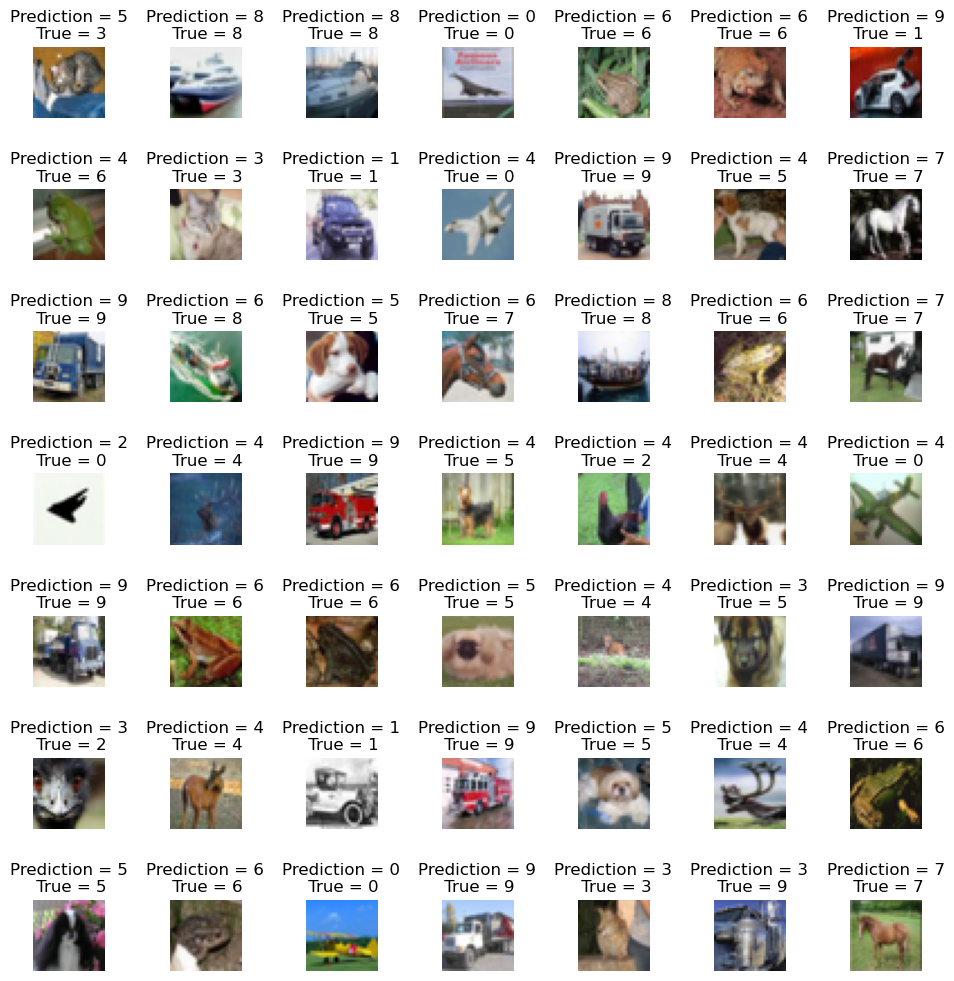

In [68]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction = {}\n True = {}".format(predicted_classes[i],y_test[i]))
    axes[i].axis("off")

plt.subplots_adjust(hspace = 1)

<Axes: >

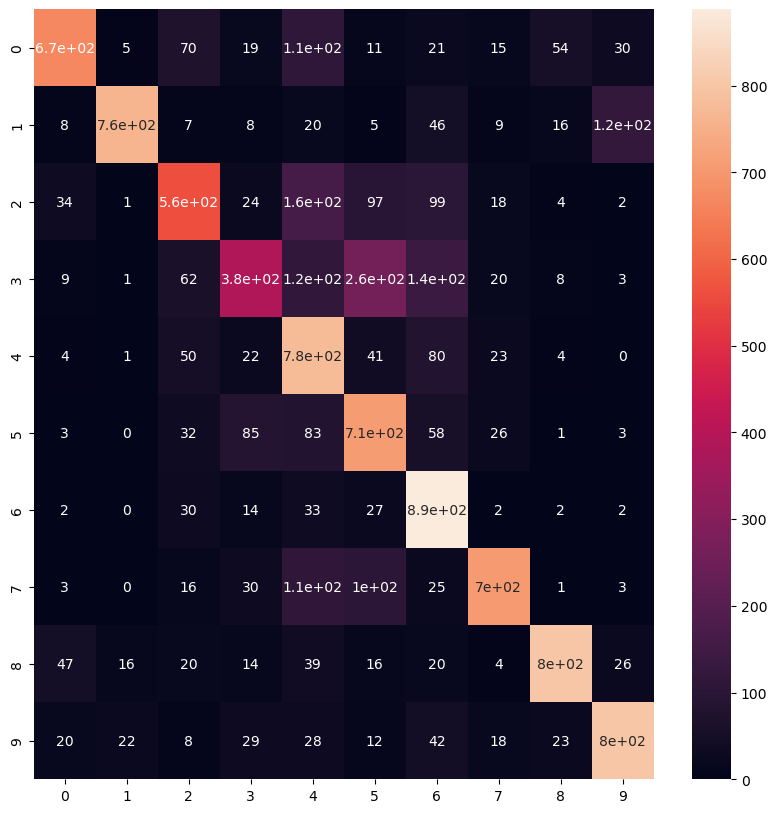

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

## SAVE THE MODEL

In [79]:
import os
directory = os.path.join(os.getcwd(), "saved_models")

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, "my_model.keras")
cnn_model.save(model_path)

## DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [83]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [85]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [87]:
X_train.shape

(50000, 32, 32, 3)

In [89]:
n = 8
X_train_sample = X_train[:n]

In [93]:
X_train_sample.shape

(8, 32, 32, 3)

In [117]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#dataget_train = ImageDataGenerator(rotation_range = 90)
#dataget_train = ImageDataGenerator(vertical_flip=True)
#dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train_sample)

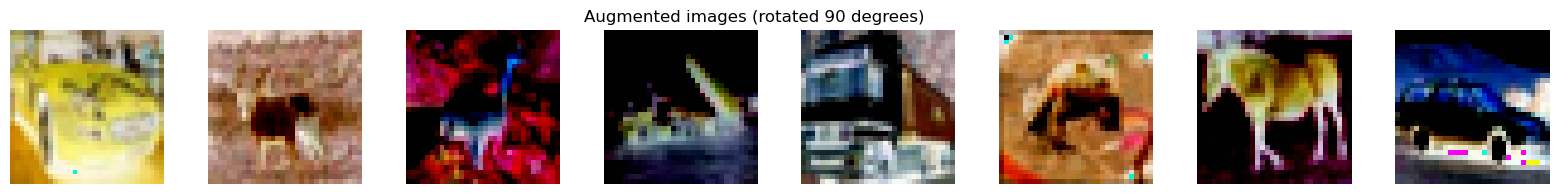

In [119]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 2))

for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i + 1)

        # Rescale from [0, 1] to [0, 255]
        img_array = (x_batch[i] * 255).astype('uint8')

        # If shape is (C, H, W), convert it to (H, W, C)
        if img_array.ndim == 3 and img_array.shape[0] <= 4:
            img_array = np.transpose(img_array, (1, 2, 0))

        # If color image and possibly in BGR, convert to RGB
        if img_array.ndim == 3 and img_array.shape[2] == 3:
            img_array = img_array[..., ::-1]

        # Convert to PIL image and show it
        img = Image.fromarray(img_array)
        ax.imshow(img)
        ax.axis('off')

    fig.suptitle("Augmented images (rotated 90 degrees)")
    plt.show()
    break
